In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
pd.set_option('display.max_columns',None)

In [42]:
df = pd.read_csv('/content/drive/MyDrive/A/gurgaon_properties_missing_value_imputation.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  

In [44]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,876.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,597.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [45]:
df.shape

(3554, 18)

In [46]:
train_df = df.drop(columns =['society','price_per_sqft'])

In [47]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,876.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,597.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


<Axes: >

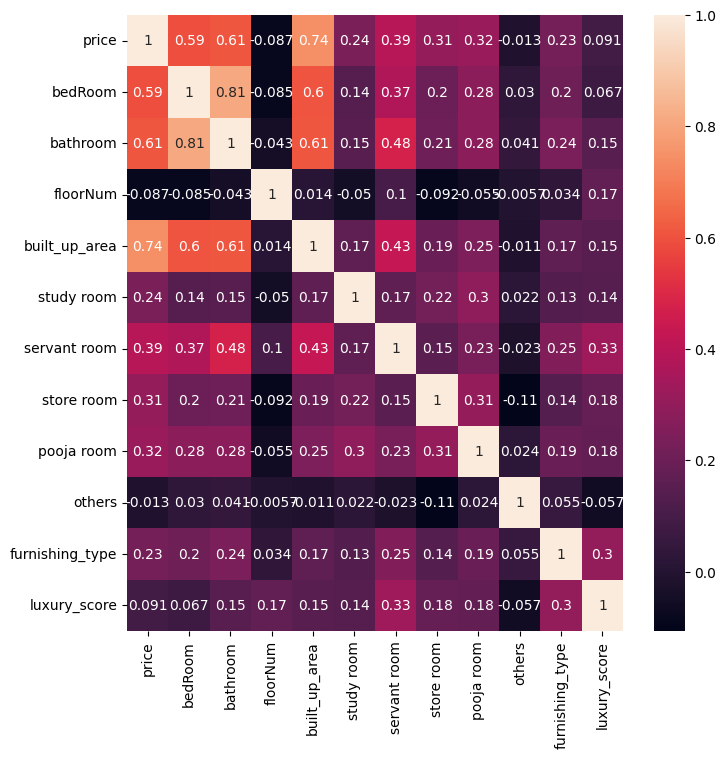

In [48]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['number'])

plt.figure(figsize=(8,8))
sns.heatmap(numeric_df.corr(),annot=True)

In [49]:
numeric_df.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
built_up_area,0.743907
bathroom,0.609777
bedRoom,0.591289
servant room,0.391930
pooja room,0.319852
store room,0.305677
study room,0.242955
furnishing_type,0.225625
luxury_score,0.091473


In [50]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,876.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,597.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


## luxury_score

<Axes: ylabel='luxury_score'>

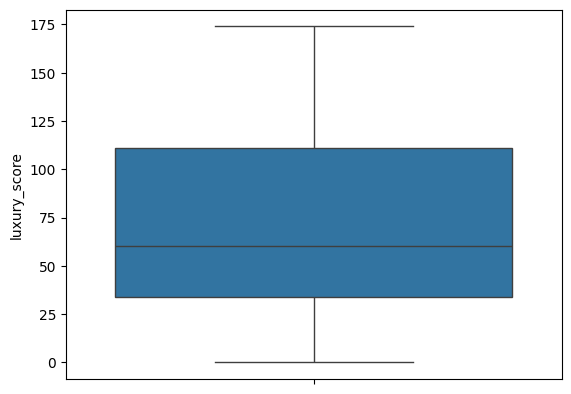

In [51]:
sns.boxplot(df['luxury_score'])

In [52]:
def categorize_luxury(score):
  if 0 <= score <= 50:
    return 'low'
  elif 50 < score <= 150:
    return 'medium'
  elif 150 < score <= 175:
    return 'high'
  else:
    return None

In [53]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [54]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,876.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,high
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,597.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,high


## floor

<Axes: ylabel='floorNum'>

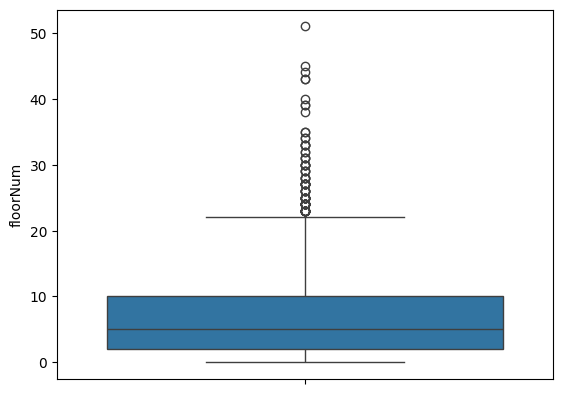

In [55]:
sns.boxplot(df['floorNum'])

In [56]:
def categorize_floor(floor):
  if 0<= floor <= 2:
    return 'low Floor'
  elif 3 <=floor <= 10:
    return 'mid floor'
  elif 11 <= floor <= 51:
    return 'high floor'
  else:
    return None

In [57]:
train_df['floor_category'] = df['floorNum'].apply(categorize_floor)

In [58]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,876.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,low,low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,low,mid floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,low,high floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,high,mid floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,597.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,high,mid floor


In [59]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [60]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,876.0,0.0,0.0,0.0,0.0,0.0,0.0,low,low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,low,mid floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,low,high floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,high,mid floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,597.0,0.0,0.0,1.0,0.0,0.0,0.0,high,mid floor


In [61]:
from sklearn.preprocessing import OrdinalEncoder
# crating a copy of orginal data for label encoding
data_label_encoded = train_df.copy()

categorical_col = train_df.select_dtypes(include=['object']).columns

# applying label encoding on categorical data
for col in categorical_col:
  oe = OrdinalEncoder()
  data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
  print(oe.categories_)

# splitting the dataset inti training and testing sets
x_label = data_label_encoded.drop('price',axis=1)
y_label = data_label_encoded['price']


[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [62]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,876.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,597.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,546.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,700.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [63]:
y_label

,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48
...,...
3549,0.37
3550,6.00
3551,0.60
3552,15.50


In [64]:
# I am gonna apply 8 feature technique,


## Technique 1- Correlation analysis

<Axes: >

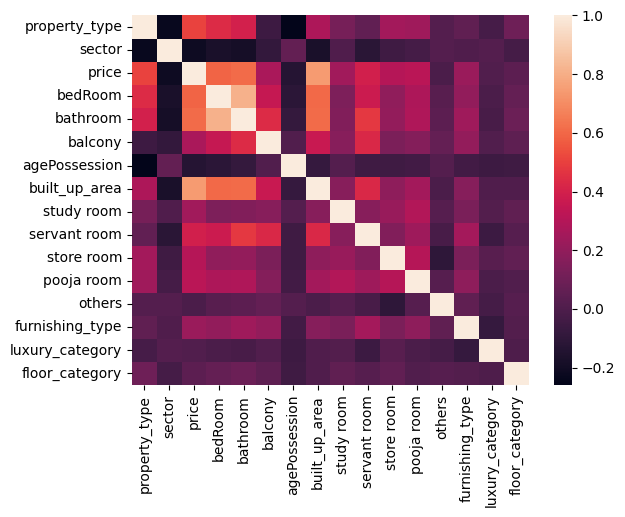

In [65]:
sns.heatmap(data_label_encoded.corr())

In [66]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature', 'price':'correlation'})

In [67]:
fi_df1
# price --bedrooms
#price--bathroom
#price --built_up_area
#price --servent room


,feature,correlation
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.743907
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


## Technique 2- Randome Forest Feature Importance

In [68]:
from sklearn.ensemble import RandomForestRegressor
# train a random forest regressor on label encoder data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_label, y_label)
# extract feature importance scoree for label encoder data
fi_df1 = pd.DataFrame({'feature': x_label.columns, 'rf_importance': rf_label.feature_importances_}).sort_values(by='rf_importance', ascending=False)

In [69]:
fi_df1

,feature,rf_importance
6,built_up_area,0.637388
0,property_type,0.113822
1,sector,0.102461
3,bathroom,0.025953
2,bedRoom,0.023402
8,servant room,0.021021
5,agePossession,0.014078
4,balcony,0.012860
12,furnishing_type,0.010006
7,study room,0.008674


## Technique 3- Gradient Boosting feature importance

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
# train a gradient boosting regressor on label encoder data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label,y_label)

#extract feature importance score for label encoded data
fi_df3 = pd.DataFrame({'feature': x_label.columns, 'gb_importance': gb_label.feature_importances_}).sort_values(by='gb_importance', ascending=False)
fi_df3

,feature,gb_importance
6,built_up_area,0.669948
0,property_type,0.105233
1,sector,0.099106
2,bedRoom,0.042445
3,bathroom,0.034663
8,servant room,0.026071
9,store room,0.007894
7,study room,0.004316
5,agePossession,0.003830
12,furnishing_type,0.003499


## Technique 4- Permutation Importance

In [71]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train_label,x_test_label,y_train_label,y_test_label = train_test_split(x_label,y_label,test_size=0.2,random_state=42)

# train a random forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_train_label, y_train_label)
# calculate permutaion importance
perm_importance = permutation_importance(rf_label, x_test_label, y_test_label,n_repeats=30, random_state=42)

# organize result into a dataframe
fi_df4 = pd.DataFrame({'feature': x_label.columns, 'perm_importance': perm_importance.importances_mean}).sort_values(by='perm_importance', ascending=False)
fi_df4



,feature,perm_importance
6,built_up_area,0.725776
0,property_type,0.221335
1,sector,0.178534
3,bathroom,0.019699
8,servant room,0.017226
2,bedRoom,0.016998
5,agePossession,0.006673
13,luxury_category,0.002407
9,store room,0.001153
14,floor_category,0.000541


## Technique 5- LASSO

In [72]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

#  standrize the feature
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

lasso = Lasso(alpha=0.1, random_state=42)

lasso.fit(x_scaled,y_label)
#extract coefficients

fi_df5 = pd.DataFrame({'feature': x_label.columns,
                      'lasso_coeff': lasso.coef_
                      }).sort_values(by='lasso_coeff', ascending=False)

In [73]:
fi_df5

,feature,lasso_coeff
6,built_up_area,1.482711
0,property_type,0.701331
3,bathroom,0.274355
9,store room,0.162938
7,study room,0.118287
8,servant room,0.104600
12,furnishing_type,0.102042
10,pooja room,0.047306
1,sector,-0.000000
2,bedRoom,0.000000


#Technique -6 RFE

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)

# Call the fit method on the RFE object before accessing the support_ attribute
selector_label = selector_label.fit(x_label, y_label)

selected_features = x_label.columns[selector_label.support_]

selected_coefficients = selector_label.estimator_.coef_ # changed from feature_importances_ to coef_

fi_df6 = pd.DataFrame({'feature': selected_features, 'rfe_coeff': selected_coefficients}).sort_values(by='rfe_coeff', ascending=False)

In [76]:
fi_df6

,feature,rfe_coeff
0,property_type,1.796791
9,store room,0.714600
7,study room,0.462898
8,servant room,0.343471
12,furnishing_type,0.303747
10,pooja room,0.206354
3,bathroom,0.191391
13,luxury_category,0.089939
2,bedRoom,0.014564
6,built_up_area,0.001235


In [79]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,876.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,597.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,546.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,700.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [80]:
export_df =  x_label.drop(columns=['pooja room','study room', 'others'])
export_df['price'] = y_label

In [81]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv',index=False)